# Import Library & Load Data

In [2]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [4]:
df = pd.read_csv('komentar_videoSumatera_ferry_irwandi.csv')
df.head() # Menampilkan 5 data teratas

,author,text,likes,time
0,@ferryirwandi,Lekas pulih Bumi Andalasku!,4 rb,2 bulan yang lalu (diedit)
1,@RahmatHidayat-r8d9h,Kejam banget para pemimpin 😢,1,3 minggu yang lalu
2,@komengkoclak7711,Memang sejak kapan pemerintah peduli pada masy...,1,3 minggu yang lalu
3,@Isnaratni,Karena dulu tdk memenangkan Prabowo jadi ndak ...,1,4 minggu yang lalu
4,@robysatriapratama311,Bg Fery bantu saya la BG. Kasih pekerjaan bg. ...,1,4 minggu yang lalu (diedit)


# Data Preprocessing (Cleaning)

In [5]:
def clean_text(text):
    if not isinstance(text, str): return ""
    # Hapus mention, link, hashtag
    text = re.sub(r'@[A-Za-z0-9_]+|http\S+|#\w+', '', text)
    # Hapus karakter selain huruf (emoji & angka)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Case folding (kecilkan huruf)
    text = text.lower().strip()
    return text

In [6]:
df['text_clean'] = df['text'].apply(clean_text)

In [7]:
df['text_clean']

0                              lekas pulih bumi andalasku
1                              kejam banget para pemimpin
2       memang sejak kapan pemerintah peduli pada masy...
3       karena dulu tdk memenangkan prabowo jadi ndak ...
4       bg fery bantu saya la bg  kasih pekerjaan bg  ...
                              ...                        
2495                                                benar
2496    yg balak hutan ya warga lokal\nbukan buat sawi...
2497    tambang emas woy  ada pt nya itu   gk mgkin cu...
2498    iya karena ada perusahaan besar disana yang ja...
2499    memang disuruh bg  prosesnya sudah sangat sist...
Name: text_clean, Length: 2500, dtype: str

# EDA

## Visualisasi WordCloud

In [8]:
# Gabungkan semua komentar menjadi satu teks besar
all_words = " ".join(df['text_clean'])

In [9]:

# Daftar kata yang ingin dibuang (stopwords) karena tidak punya makna sentimen
stopwords_tambahan = {'dan', 'di', 'ke', 'dari', 'untuk', 'pada', 'ini', 'itu', 'yang', 'juga', 'dengan', 'ada', 'sudah', 'saya', 'kita', 'kalo', 'kalau', 'aja', 'jadi', 'yg', 'gk', 'ya', 'bgt', 'banget'}

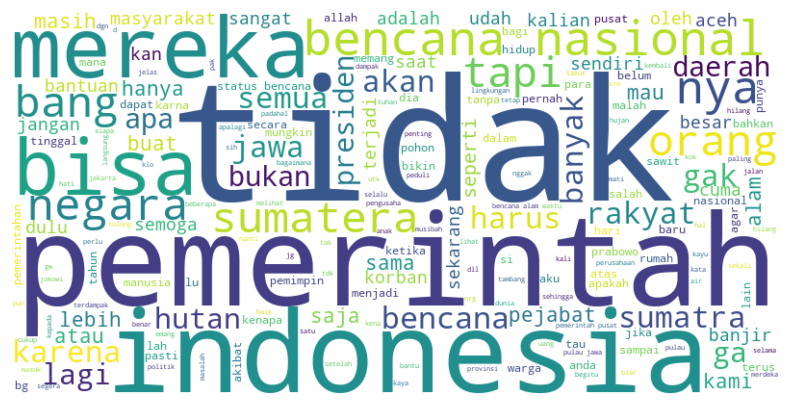

In [10]:
# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                    stopwords=stopwords_tambahan, colormap='viridis').generate(all_words)

# Menampilkan grafik
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Hasil Analisa Awal**

Berdasarkan data 2500 komentar yang kamu ambil, berikut adalah kata-kata yang paling dominan muncul (setelah saya bersihkan secara otomatis):

- "Bencana" (834 kali) & "Nasional" (377 kali): Ini membuktikan penonton Ferry Irwandi sangat merespon argumen utama video tentang urgensi status bencana nasional.

- "Pemerintah" (442 kali) & "Negara" (262 kali): Menunjukkan banyak opini yang diarahkan sebagai kritik atau harapan kepada pemangku kebijakan.

- "Jawa" (319 kali) & "Sumatera" (288 kali): Ini menarik! Banyak penonton yang mendiskusikan masalah disparitas (perbedaan) penanganan antara Jawa dan luar Jawa.

- "Hutan" (297 kali): Menunjukkan penonton juga menyadari penyebab bencana terkait kerusakan lingkungan (deforestasi).